## Imports

In [1]:
import pandas as pd
import sys

sys.path.insert(0,'../')

from postprocess import *

## Interaction data processing

In [2]:
# For SATORI based interactions
#df = pd.read_csv('../Results/TAL-GATA_binaryFeat_Analysis_customTFs_euclidean_v8/Interactions_SATORI/interactions_summary_attnLimit-0.12.txt',sep='\t')

# For FIS based interactions
df = pd.read_csv('../Results/TAL-GATA_binaryFeat_Analysis_customTFs_euclidean_v8/Interactions_FIS/interactions_summary_attnLimit-0.txt',sep='\t')

### Filter based on interaction and motif hit p-values, and keep the most significant interactions

In [3]:
df = filter_data_on_thresholds(df, motifA_pval_cutoff=0.05, motifB_pval_cutoff=0.05)

In [4]:
df.shape

(193, 12)

### Load the motif description file to annotate the interactions. 
Here we use CISBP (U toronto) motif description file. 

In [5]:
df_annotate = pd.read_csv('../../../Basset_Splicing_IR-iDiffIR/Analysis_For_none_network-typeB_lotus_posThresh-0.60/MEME_analysis/Homo_sapiens_2019_01_14_4_17_pm/TF_Information_all_motifs.txt',sep='\t')

In [6]:
df_annotate.head()

,TF_ID,Family_ID,TSource_ID,Motif_ID,MSource_ID,DBID,TF_Name,TF_Species,TF_Status,Family_Name,...,MSource_Type,MSource_Author,MSource_Year,PMID,MSource_Version,TfSource_Name,TfSource_URL,TfSource_Year,TfSource_Month,TfSource_Day
0,T004843_1.02,F035_1.02,TS19_1.02,M2938_1.02,MS26_1.02,ENSG00000008196,TFAP2B,Homo_sapiens,D,AP-2,...,Transfac,Matys,2006,16381825,2014.2,Ensembl,http://www.ensembl.org/,2011,Oct,26
1,T004843_1.02,F035_1.02,TS19_1.02,M5917_1.02,MS20_1.02,ENSG00000008196,TFAP2B,Homo_sapiens,D,AP-2,...,SELEX,Jolma,2013,23332764,January 2013,Ensembl,http://www.ensembl.org/,2011,Oct,26
2,T004843_1.02,F035_1.02,TS19_1.02,M5918_1.02,MS20_1.02,ENSG00000008196,TFAP2B,Homo_sapiens,D,AP-2,...,SELEX,Jolma,2013,23332764,January 2013,Ensembl,http://www.ensembl.org/,2011,Oct,26
3,T004843_1.02,F035_1.02,TS19_1.02,M5919_1.02,MS20_1.02,ENSG00000008196,TFAP2B,Homo_sapiens,D,AP-2,...,SELEX,Jolma,2013,23332764,January 2013,Ensembl,http://www.ensembl.org/,2011,Oct,26
4,T004843_1.02,F035_1.02,TS19_1.02,M6144_1.02,MS18_1.02,ENSG00000008196,TFAP2B,Homo_sapiens,D,AP-2,...,HocoMoco,Kulakovskiy,2013,23175603,July 2014,Ensembl,http://www.ensembl.org/,2011,Oct,26


### Annotate the interacting motifs

In [7]:
df['TF1'] = df['motif1'].apply(get_annotation, annotation_data = df_annotate, single_TF=True)
df['TF2'] = df['motif2'].apply(get_annotation, annotation_data = df_annotate, single_TF=True)

In [8]:
df.head()

,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2
0,filter17<-->filter38,3267,M1868_1.02,0.015295,M1868_1.02,0.005790,330.0,33.0,232.0,301.0,0.037413,0.040260,GATA2,GATA2
1,filter17<-->filter53,3282,M1868_1.02,0.015295,M1868_1.02,0.002646,97.0,77.0,264.0,353.0,0.020239,0.022358,GATA2,GATA2
3,filter17<-->filter65,3294,M1868_1.02,0.015295,M1868_1.02,0.049029,807.0,376.0,414.0,953.0,0.030256,0.032831,GATA2,GATA2
5,filter17<-->filter68,3297,M1868_1.02,0.015295,M1868_1.02,0.003245,465.0,410.0,210.0,423.0,0.000178,0.000263,GATA2,GATA2
9,filter17<-->filter107,3336,M1868_1.02,0.015295,M4600_1.02,0.042661,670.0,600.0,250.0,347.0,0.001731,0.002180,GATA2,GATA1


In [9]:
df['TF_Interaction'] = df.apply(lambda x: x['TF1']+r'$\longleftrightarrow$'+x['TF2'], axis=1)

### Drop same motif interactions

In [10]:
df = df[df['TF1']!=df['TF2']]

In [11]:
df.shape

(77, 15)

In [12]:
df = df.reset_index(drop=True)

### Fix redundant interaction pairs

In [13]:
df = process_for_redundant_interactions(df, intr_type='TF')

In [14]:
df.head()

,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2,TF_Interaction
0,filter17<-->filter107,3336,M1868_1.02,0.015295,M4600_1.02,0.042661,670.0,600.0,250.0,347.0,0.001731,0.002180,GATA2,GATA1,GATA2$\longleftrightarrow$GATA1
1,filter17<-->filter122,3351,M1868_1.02,0.015295,M6500_1.02,0.000105,381.0,283.0,120.0,299.0,0.007197,0.008364,GATA2,LYL1,GATA2$\longleftrightarrow$LYL1
2,filter17<-->filter174,3403,M1868_1.02,0.015295,M6500_1.02,0.004054,269.0,108.0,406.0,775.0,0.000065,0.000104,GATA2,LYL1,GATA2$\longleftrightarrow$LYL1
3,filter17<-->filter187,3416,M1868_1.02,0.015295,M6500_1.02,0.022342,266.0,494.0,332.0,554.0,0.011371,0.012903,GATA2,LYL1,GATA2$\longleftrightarrow$LYL1
4,filter38<-->filter107,6927,M1868_1.02,0.005790,M4600_1.02,0.042661,222.0,37.0,262.0,320.0,0.040419,0.043375,GATA2,GATA1,GATA2$\longleftrightarrow$GATA1


In [15]:
df.shape

(77, 15)

## Most Frequent TF Family Interactions

In [16]:
tf_family_dict = {}
for TF in df_annotate['TF_Name']:
    tf_family_dict[TF] = df_annotate[df_annotate['TF_Name']==TF]['Family_Name'].iloc[0]
df['TF1_Family'] = df['TF1'].apply(lambda x: tf_family_dict[x] if x in tf_family_dict else 'UNKNOWN')
df['TF2_Family'] = df['TF2'].apply(lambda x: tf_family_dict[x] if x in tf_family_dict else 'UNKNOWN')

In [17]:
df['Family_Interaction'] = df.apply(lambda x: x['TF1_Family']+r'$\longleftrightarrow$'+x['TF2_Family'],axis=1)

In [18]:
df = process_for_redundant_interactions(df, intr_type='Family')

In [19]:
df.head()

,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2,TF_Interaction,TF1_Family,TF2_Family,Family_Interaction
0,filter17<-->filter107,3336,M1868_1.02,0.015295,M4600_1.02,0.042661,670.0,600.0,250.0,347.0,0.001731,0.002180,GATA2,GATA1,GATA2$\longleftrightarrow$GATA1,GATA,GATA,GATA$\longleftrightarrow$GATA
1,filter17<-->filter122,3351,M1868_1.02,0.015295,M6500_1.02,0.000105,381.0,283.0,120.0,299.0,0.007197,0.008364,GATA2,LYL1,GATA2$\longleftrightarrow$LYL1,GATA,bHLH,GATA$\longleftrightarrow$bHLH
2,filter17<-->filter174,3403,M1868_1.02,0.015295,M6500_1.02,0.004054,269.0,108.0,406.0,775.0,0.000065,0.000104,GATA2,LYL1,GATA2$\longleftrightarrow$LYL1,GATA,bHLH,GATA$\longleftrightarrow$bHLH
3,filter17<-->filter187,3416,M1868_1.02,0.015295,M6500_1.02,0.022342,266.0,494.0,332.0,554.0,0.011371,0.012903,GATA2,LYL1,GATA2$\longleftrightarrow$LYL1,GATA,bHLH,GATA$\longleftrightarrow$bHLH
4,filter38<-->filter107,6927,M1868_1.02,0.005790,M4600_1.02,0.042661,222.0,37.0,262.0,320.0,0.040419,0.043375,GATA2,GATA1,GATA2$\longleftrightarrow$GATA1,GATA,GATA,GATA$\longleftrightarrow$GATA


### Distribution of individual TF or TF family interactions

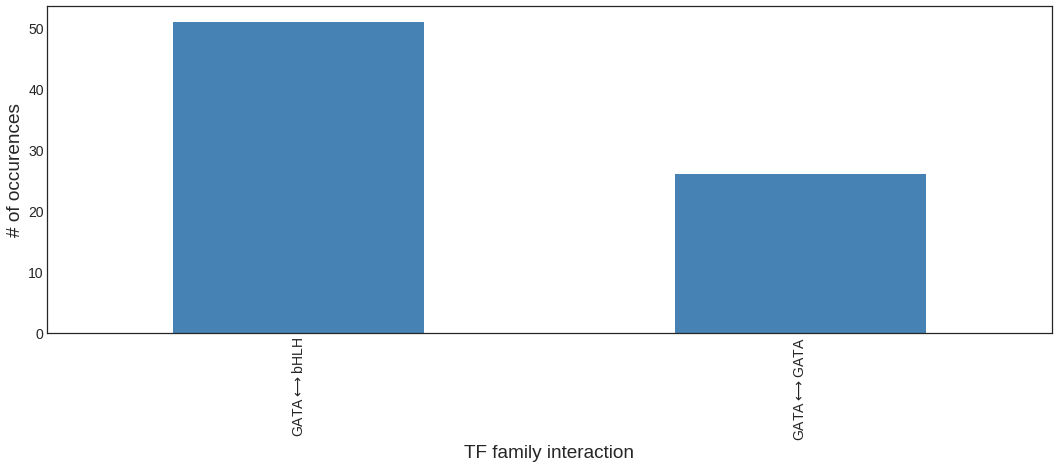

In [20]:
plot_frequent_interactions(df, intr_level='Family_Interaction', first_n=15)

### Plot interaction distance distribution

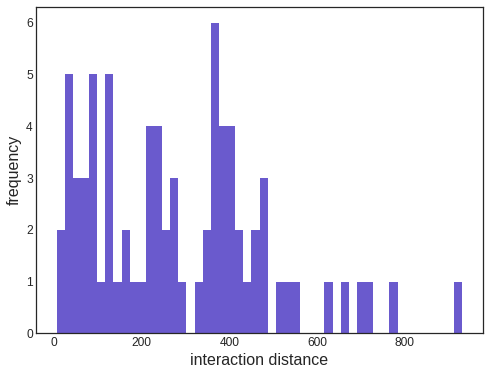

In [21]:
plot_interaction_distance_distribution(df, nbins=50, fig_size=(8,6))

In [28]:
df['mean_distance'].mean(), df['mean_distance'].median()

(287.5844155844156, 254.0)

### Most frequent interactions and their respective interaction distances

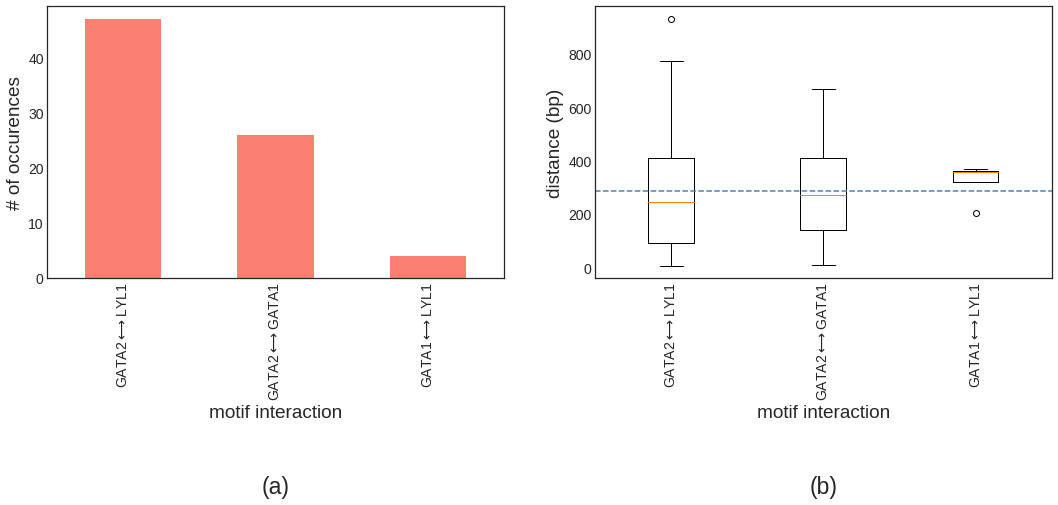

In [22]:
plot_interactions_and_distances_boxplot(df, first_n=15, sort_distances=False, add_sub_caption=True, show_mean_dist=True)

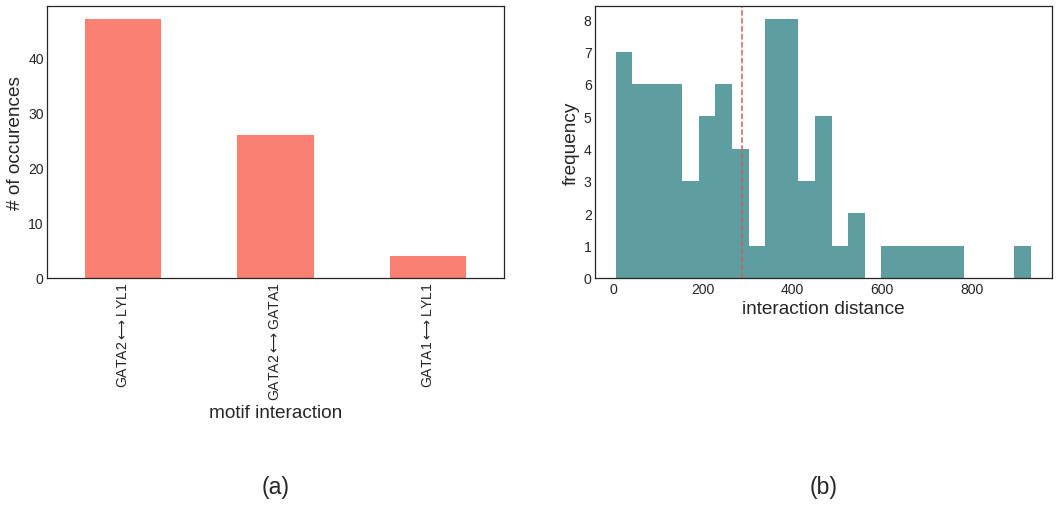

In [23]:
plot_interactions_and_distances_histogram(df, first_n=15, dist_nbins=25, add_sub_caption=True, show_mean_dist=True)

### Annotate Interactions using TRRUSTv2 (and other sources)

#### Read TRRUSTv2 interactions

In [24]:
#dictionaries with genes/TFs as keys and [target_gene/TF, role, PUBMID ID] as value
with open('/s/jawar/h/nobackup/fahad/Human_Chromatin/TRUSTv2/human_co-regulate_dict.pckl','rb') as f:
    human_dict = pickle.load(f)

In [25]:
df['Interaction_in_TRUSTv2'] = df['TF_Interaction'].apply(db_annotate_interaction, intr_dict = human_dict)

In [26]:
df_resTRUSTv2 = df[df['Interaction_in_TRUSTv2']==1]

In [27]:
df_resTRUSTv2[['TF_Interaction','TF1_Family','TF2_Family','adjusted_pval']].sort_values(by='adjusted_pval').drop_duplicates('TF_Interaction')

,TF_Interaction,TF1_Family,TF2_Family,adjusted_pval
20,GATA2$\longleftrightarrow$LYL1,GATA,bHLH,3.320157e-13
14,GATA2$\longleftrightarrow$GATA1,GATA,GATA,3.647309e-09
